Dane pochodzą z Kaggle:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
aviation = pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False)
# df = pd.read_csv("USState_Codes.csv")

In [3]:

pd.set_option('display.max_columns', None)
aviation.shape

(88889, 31)

In [4]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
29343,20001212X18303,Accident,FTW92LA012,1991-10-20,"DENISON, TX",United States,NaN,NaN,TX12,KIDD,Non-Fatal,Substantial,NaN,N8560H,North American,NAVION,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,4.0,VMC,Takeoff,Probable Cause,08-04-1993
85227,20201008102115,Accident,CEN20WA432,2020-08-19,"Nabern, Germany",Germany,NaN,NaN,NaN,NaN,NaN,Substantial,Airplane,D-ECKT,CESSNA,F172,No,NaN,NaN,NUSN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3700,20001214X41974,Accident,DEN83FTI03,1983-01-15,"GALEN, MT",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N4610Y,Piper,PA-18-150,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,1.0,0.0,0.0,VMC,Maneuvering,Probable Cause,NaN
28559,20001212X17716,Accident,SEA91LA178,1991-07-17,"PULLMAN, WA",United States,NaN,NaN,NaN,NONE,Non-Fatal,Substantial,NaN,N6657Q,Grumman,G-164-B,No,1.0,Reciprocating,NaN,UNK,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,08-02-1993
60172,20060228X00256,Accident,DFW06CA064,2006-02-02,"COMSTOCK, TX",United States,29.789166,-101.172223,NaN,NaN,Non-Fatal,Substantial,Airplane,N192D,Wsk-pzl Warzawaokecie,PZL-104 WILGA 80,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Cruise,Probable Cause,30-05-2006
45148,20001211X11311,Accident,MIA99LA015,1998-10-24,"PENSACOLA, FL",United States,NaN,NaN,83J,COSTAL,Non-Fatal,Substantial,NaN,N70136,Peters,STROJNIK S2A,Yes,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,15-02-2001
44809,20001211X10971,Accident,ANC98LA138,1998-09-02,"DILLINGHAM, AK",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N139F,Grumman,G-44,No,2.0,Reciprocating,NaN,NSCH,Unknown,Fresh Water Adventures (dba: Fresh Water Adven...,0.0,0.0,0.0,3.0,VMC,Maneuvering,Probable Cause,30-03-2000
86738,20210816103700,Accident,WPR21LA318,2021-08-12,"Puyallup, WA",United States,047614N,1221714W,PLU,NaN,Non-Fatal,Substantial,Airplane,N392W,NORTH AMERICAN,T-28B,No,1.0,NaN,091,NaN,Personal,BUNO 138314 LLC,0.0,0.0,0.0,1.0,NaN,NaN,NaN,17-09-2021
4124,20001214X42441,Accident,FTW83LA156,1983-03-15,"RAMON, NM",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N1841P,Piper,PA-22-150,Yes,1.0,Reciprocating,NaN,NaN,Business,NaN,0.0,0.0,0.0,4.0,VMC,Other,Probable Cause,NaN
83049,20190415X92143,Accident,ERA19LA152,2019-04-15,"Dublin, GA",United States,003200N,0008200W,48GA,Fairview Park Hospital,Non-Fatal,Substantial,Helicopter,N395AE,Bell,206,No,1.0,Turbo Shaft,135,NSCH,NaN,Air Evac Ems Inc,0.0,0.0,0.0,3.0,VMC,NaN,NaN,26-09-2020


In [6]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#creating a copy of original dataframe
original_aviation = aviation.copy()

In [8]:
aviation.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#listing columns that contain Nans (as there are 27 columns that are incomplete, there is a need to consider how to handle the issue )
missing_data_col = aviation.columns[aviation.isna().any()].tolist()
missing_data_col, len(missing_data_col)

(['Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport.Code',
  'Airport.Name',
  'Injury.Severity',
  'Aircraft.damage',
  'Aircraft.Category',
  'Registration.Number',
  'Make',
  'Model',
  'Amateur.Built',
  'Number.of.Engines',
  'Engine.Type',
  'FAR.Description',
  'Schedule',
  'Purpose.of.flight',
  'Air.carrier',
  'Total.Fatal.Injuries',
  'Total.Serious.Injuries',
  'Total.Minor.Injuries',
  'Total.Uninjured',
  'Weather.Condition',
  'Broad.phase.of.flight',
  'Report.Status',
  'Publication.Date'],
 27)

In [10]:
#creating a function removing columns with missing data above established threshold and listing the removed columns

def drop_columns(df, thr = 0.5):
    missing_percentages = df.isna().mean()
    col_to_drop = missing_percentages[missing_percentages > thr].index
    new_df=df.drop(columns = col_to_drop)
    return new_df, list(col_to_drop)
    
    

In [11]:
# there are 6 columns to be removed when threshold 0.5 is applied
dropped_col_df, dropped_columns = drop_columns(aviation, 0.5)
dropped_columns

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [12]:
# there are 8 columns to be removed when threshold 0.4 is applied
dropped_col_df, dropped_columns = drop_columns(aviation, 0.4)
dropped_columns

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [13]:
dropped_col_df.shape

(88889, 23)

In [14]:
#I decide to perform an analysis applying the threshold 0.4.

dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:

# For numerical variables the missing data will be replaced with a mean, but firstly let's check the number of missing values.


from tabulate import tabulate

def check_missing_values(df):
    pd.set_option('display.max_rows', None)
    print("The number of missing values in each column:")
    table_data = []
    for column in df.columns:
        missing_count = df[column].isna().sum()
        table_data.append([column, missing_count])

    print(tabulate(table_data, headers = ["Column", "No. of missing values"], tablefmt = "grid"))

    pd.reset_option('display.max_rows', None)

In [16]:
check_missing_values(dropped_col_df)

The number of missing values in each column:
+------------------------+-------------------------+
| Column                 |   No. of missing values |
+========================+=========================+
| Event.Id               |                       0 |
+------------------------+-------------------------+
| Investigation.Type     |                       0 |
+------------------------+-------------------------+
| Accident.Number        |                       0 |
+------------------------+-------------------------+
| Event.Date             |                       0 |
+------------------------+-------------------------+
| Location               |                      52 |
+------------------------+-------------------------+
| Country                |                     226 |
+------------------------+-------------------------+
| Injury.Severity        |                    1000 |
+------------------------+-------------------------+
| Aircraft.damage        |                    3194 |
+

In [14]:
# dropped_col_df["Total.Fatal.Injuries"].fillna(dropped_col_df["Total.Fatal.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Serious.Injuries"].fillna(dropped_col_df["Total.Serious.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Minor.Injuries"].fillna(dropped_col_df["Total.Minor.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Uninjured"].fillna(dropped_col_df["Total.Uninjured"].mean(), inplace = True)

# dropped_col_df["Location"].fillna('Unknown', inplace = True)
# dropped_col_df["Country"].fillna('Unknown', inplace = True)
# dropped_col_df["Injury.Severity"].fillna('Unknown', inplace = True)
# dropped_col_df["Aircraft.damage"].fillna('Unknown', inplace = True)
# dropped_col_df["Registration.Number"].fillna('Unknown', inplace = True)
# dropped_col_df["Make"].fillna('Unknown', inplace = True)
# dropped_col_df["Model"].fillna('Unknown', inplace = True)
# dropped_col_df["Amateur.Built"].fillna('Unknown', inplace = True)
# dropped_col_df["Number.of.Engines"].fillna('Unknown', inplace = True)
# dropped_col_df["Engine.Type"].fillna('Unknown', inplace = True)
# dropped_col_df["Purpose.of.flight"].fillna('Unknown', inplace = True)
# dropped_col_df["Weather.Condition"].fillna('Unknown', inplace = True)
# dropped_col_df["Broad.phase.of.flight"].fillna('Unknown', inplace = True)
# dropped_col_df["Report.Status"].fillna('Unknown', inplace = True)
# dropped_col_df["Publication.Date"].fillna('Unknown', inplace = True)


In [37]:
#the DataFrame without any nans (all the missing values have been removed)

dropped_col_df = dropped_col_df.dropna()
dropped_col_df["Year"] = dropped_col_df["Event.Date"].dt.year
dropped_col_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Death.Ratio,Year
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1.0,1962
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1.0,1977
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1.0,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.0,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.0,1982


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

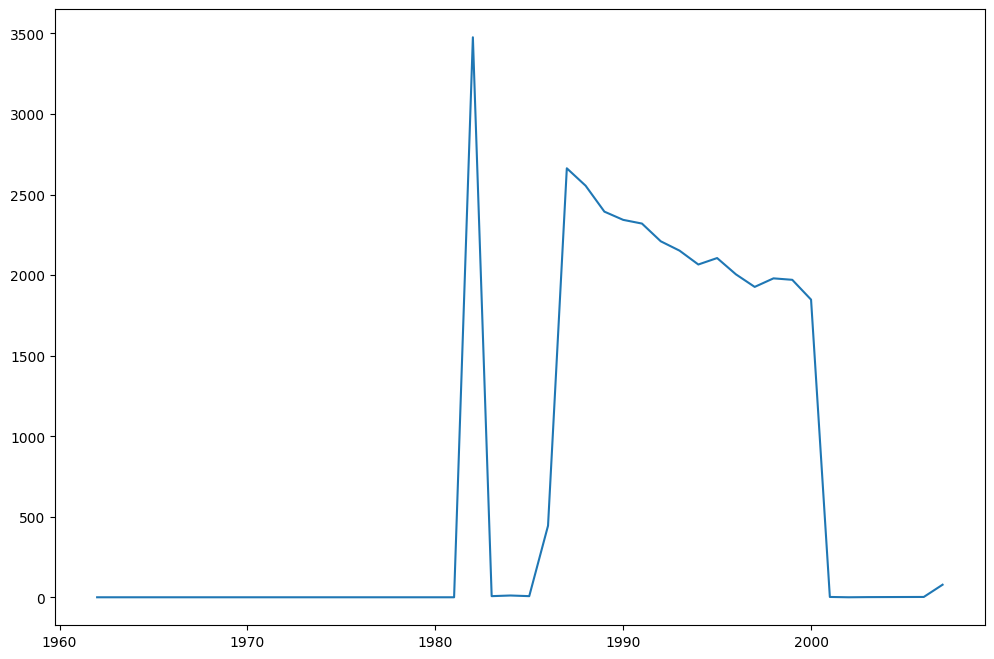

In [48]:
#data visualisation

accidents_by_year = dropped_col_df["Year"].value_counts().sort_index()


plt.figure(figsize=(12,8))
plt.plot(accidents_by_year.index, accidents_by_year.values)

In [63]:
original_aviation["Event.Date"] = pd.to_datetime(original_aviation["Event.Date"])
original_aviation["Year"] = original_aviation["Event.Date"].dt.year
original_aviation_1982 = original_aviation[original_aviation["Year"] >=1982]
accidents_by_year_original = original_aviation["Year"].value_counts().sort_index()
accidents_by_year_1982 = original_aviation_1982["Year"].value_counts().sort_index()

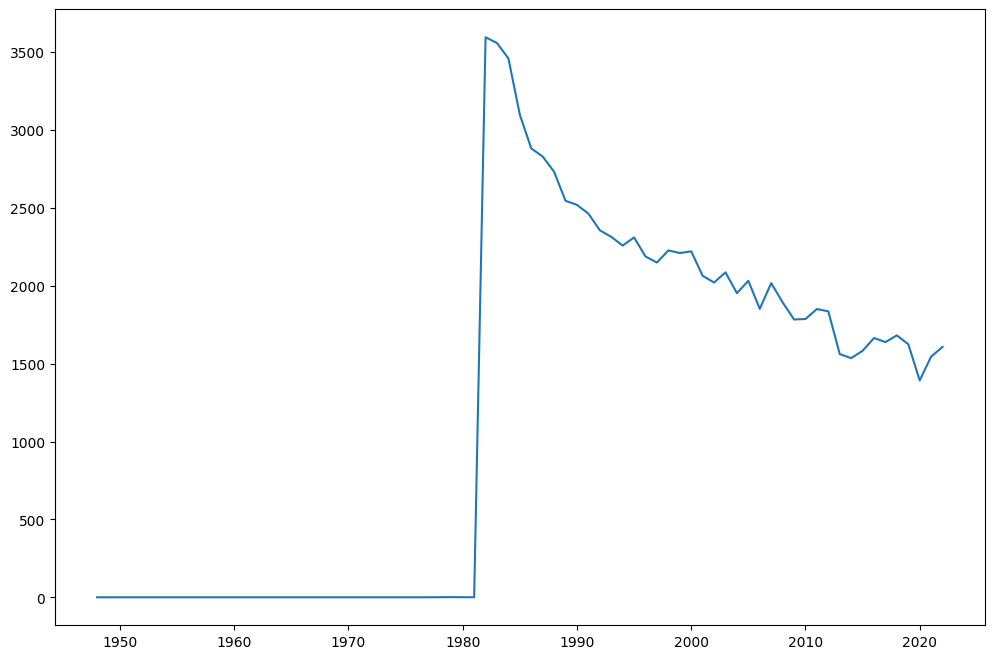

In [61]:
# the plot does not 

plt.figure(figsize=(12,8))
plt.plot(accidents_by_year_original.index, accidents_by_year_original.values)

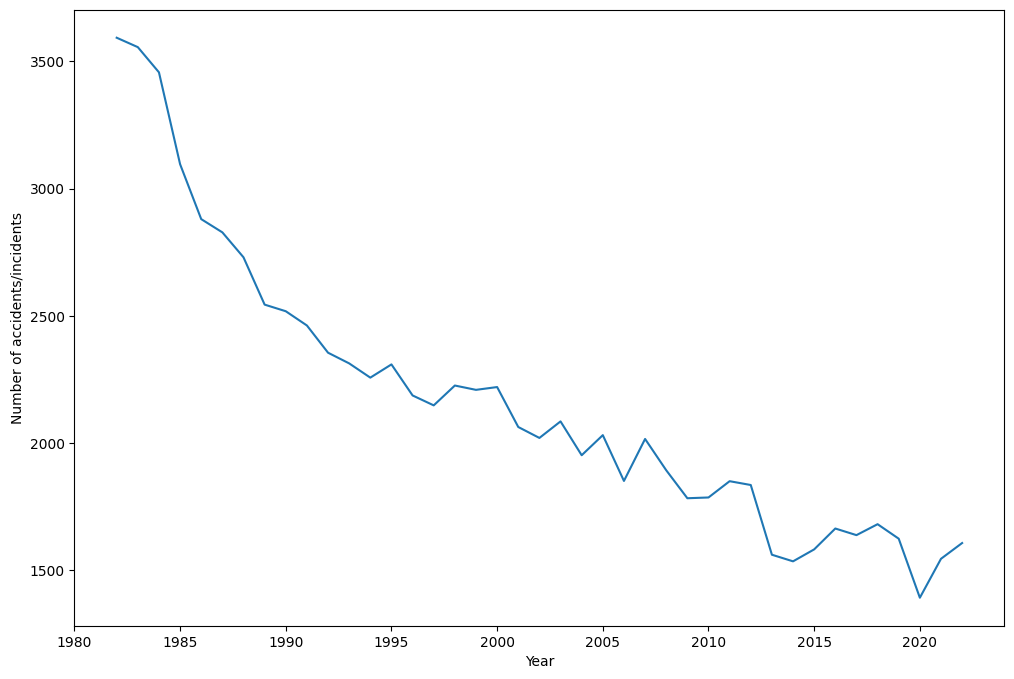

In [69]:
plt.figure(figsize=(12,8))
plt.plot(accidents_by_year_1982.index, accidents_by_year_1982.values)
plt.xlabel("Year")
plt.ylabel("Number of accidents/incidents")
plt.show()

In [70]:
df_usa = dropped_col_df[dropped_col_df["Country"] == "United States"]

In [73]:
import us

all_states = us.states.STATES

for state in all_states:
    print(state)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [76]:
state_abbr = [state.abbr for state in all_states]
state_abbr

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [80]:
df_usa["State"] = df_usa["Location"].str[-2:]
df_usa

/tmp/ipykernel_4697/1412933157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["State"] = df_usa["Location"].str[-2:]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Death.Ratio,Year,State
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1.0,1962,CA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1.0,1977,CA
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1.0,1981,MN
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.0,1982,WA
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.0,1982,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63893,20080104X00022,Accident,MIA08LA032,2007-12-26,"SARASOTA, FL",United States,Non-Fatal,Substantial,N5875Q,Mooney,M20E,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009,0.0,2007,FL
63896,20071231X02008,Incident,DEN08IA044,2007-12-26,"Aspen, CO",United States,Incident,Minor,N47BC,Piper,PA-46-310P,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause,24-12-2008,0.0,2007,CO
63900,20080102X00006,Accident,SEA08LA054,2007-12-28,"MURRIETA, CA",United States,Non-Fatal,Substantial,N365SX,Hein,Sonex,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause,24-12-2008,0.0,2007,CA
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,RAF 2000 GTX,Yes,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,03-12-2008,1.0,2007,TX


In [19]:
dropped_col_df["Make"].unique()

array(['Piper', 'Rockwell', 'Cessna', ..., 'Wootton, John', 'Hein',
       'Althouse'], dtype=object)

In [20]:
dropped_col_df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000
mean,1.131286,0.413348,0.195078,0.333275,2.764350
std,0.406069,2.519936,0.891545,1.566937,17.277955
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,230.000000,81.000000,125.000000,461.000000


In [21]:
#changing date (presented as string) to date format 
dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])


/tmp/ipykernel_4697/4147165163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])


In [22]:
# Data preprocessing - Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_features = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               remainder='passthrough')

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())




In [29]:
transformed_data

,num__Number.of.Engines,num__Total.Fatal.Injuries,num__Total.Serious.Injuries,num__Total.Minor.Injuries,num__Total.Uninjured,cat__Investigation.Type_Accident,cat__Investigation.Type_Incident,cat__Aircraft.damage_Destroyed,cat__Aircraft.damage_Minor,cat__Aircraft.damage_Substantial,cat__Amateur.Built_No,cat__Amateur.Built_Yes,cat__Number.of.Engines_0.0,cat__Number.of.Engines_1.0,cat__Number.of.Engines_2.0,cat__Number.of.Engines_3.0,cat__Number.of.Engines_4.0,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_Unknown,cat__Purpose.of.flight_Aerial Application,cat__Purpose.of.flight_Aerial Observation,cat__Purpose.of.flight_Business,cat__Purpose.of.flight_Executive/corporate,cat__Purpose.of.flight_Ferry,cat__Purpose.of.flight_Flight Test,cat__Purpose.of.flight_Glider Tow,cat__Purpose.of.flight_Instructional,cat__Purpose.of.flight_Other Work Use,cat__Purpose.of.flight_Personal,cat__Purpose.of.flight_Positioning,cat__Purpose.of.flight_Public Aircraft,cat__Purpose.of.flight_Public Aircraft - Federal,cat__Purpose.of.flight_Public Aircraft - Local,cat__Purpose.of.flight_Skydiving,cat__Purpose.of.flight_Unknown,cat__Weather.Condition_IMC,cat__Weather.Condition_UNK,cat__Weather.Condition_VMC,cat__Broad.phase.of.flight_Approach,cat__Broad.phase.of.flight_Climb,cat__Broad.phase.of.flight_Cruise,cat__Broad.phase.of.flight_Descent,cat__Broad.phase.of.flight_Go-around,cat__Broad.phase.of.flight_Landing,cat__Broad.phase.of.flight_Maneuvering,cat__Broad.phase.of.flight_Other,cat__Broad.phase.of.flight_Standing,cat__Broad.phase.of.flight_Takeoff,cat__Broad.phase.of.flight_Taxi,cat__Broad.phase.of.flight_Unknown,remainder__Event.Id,remainder__Accident.Number,remainder__Event.Date,remainder__Location,remainder__Country,remainder__Injury.Severity,remainder__Registration.Number,remainder__Make,remainder__Model,remainder__Report.Status,remainder__Publication.Date
0,-0.323314,1.423331,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),N5069P,Piper,PA24-180,Probable Cause,19-09-1996
1,-0.323314,0.629649,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),N1168J,Rockwell,112,Probable Cause,12-09-2000
2,-0.323314,1.423331,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20001218X45446,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),N4988E,Cessna,180,Probable Cause,06-11-2001
3,-0.323314,-0.164034,-0.218812,-0.212695,-0.044239,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,N2482N,Cessna,140,Probable Cause,01-01-1982
4,2.139358,-0.164034,-0.218812,-0.212695,-0.044239,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,N7967Q,Cessna,401B,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [24]:
# analyzing the total fatal injuries

dropped_col_df["Total.Fatal.Injuries"].describe()

count    34581.000000
mean         0.413348
std          2.519936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        230.000000
Name: Total.Fatal.Injuries, dtype: float64

In [25]:
# The below records refer to one accident that took place in 1996 in Indie. Two planes crashed in the air. 349 is the total number of injuries from both aircrafts. 
# In the analysis it is an outlier.

dropped_col_df[dropped_col_df["Total.Fatal.Injuries"] == 349]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(dropped_col_df["Total.Fatal.Injuries"], )

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 800x600 with 0 Axes>

ValueError: not enough values to unpack (expected 2, got 1)

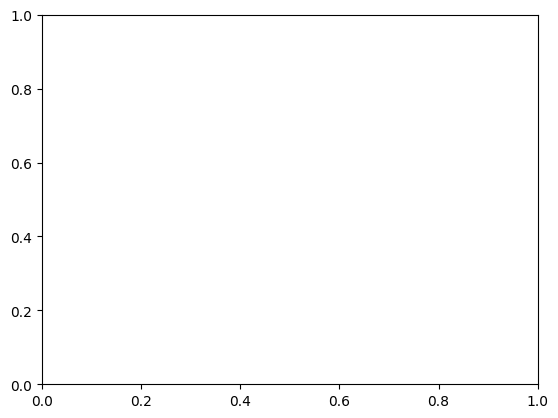

In [40]:

plt.boxplot(dropped_col_df["Total.Fatal.Injuries"], vert = False, whis=[2])
plt.show()

In [26]:
percentile_99 = np.percentile(dropped_col_df["Total.Fatal.Injuries"], 99)
percentile_99

# In 99% of records the number of casualties is 4 or fewer.

4.0

In [27]:
#creating scatter plot to make data more readable / easily visible

counts_fatal = dropped_col_df["Total.Fatal.Injuries"].value_counts()

plt.figure(figsize=(14,8))
plt.scatter(counts_fatal.index, counts_fatal)
plt.xlabel("The number of casualties")
plt.ylabel("# of occurrences")
plt.title("Scatter plot of Fatal Injuries count")
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [28]:
transformed_data

,num__Number.of.Engines,num__Total.Fatal.Injuries,num__Total.Serious.Injuries,num__Total.Minor.Injuries,num__Total.Uninjured,cat__Investigation.Type_Accident,cat__Investigation.Type_Incident,cat__Aircraft.damage_Destroyed,cat__Aircraft.damage_Minor,cat__Aircraft.damage_Substantial,cat__Amateur.Built_No,cat__Amateur.Built_Yes,cat__Number.of.Engines_0.0,cat__Number.of.Engines_1.0,cat__Number.of.Engines_2.0,cat__Number.of.Engines_3.0,cat__Number.of.Engines_4.0,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_Unknown,cat__Purpose.of.flight_Aerial Application,cat__Purpose.of.flight_Aerial Observation,cat__Purpose.of.flight_Business,cat__Purpose.of.flight_Executive/corporate,cat__Purpose.of.flight_Ferry,cat__Purpose.of.flight_Flight Test,cat__Purpose.of.flight_Glider Tow,cat__Purpose.of.flight_Instructional,cat__Purpose.of.flight_Other Work Use,cat__Purpose.of.flight_Personal,cat__Purpose.of.flight_Positioning,cat__Purpose.of.flight_Public Aircraft,cat__Purpose.of.flight_Public Aircraft - Federal,cat__Purpose.of.flight_Public Aircraft - Local,cat__Purpose.of.flight_Skydiving,cat__Purpose.of.flight_Unknown,cat__Weather.Condition_IMC,cat__Weather.Condition_UNK,cat__Weather.Condition_VMC,cat__Broad.phase.of.flight_Approach,cat__Broad.phase.of.flight_Climb,cat__Broad.phase.of.flight_Cruise,cat__Broad.phase.of.flight_Descent,cat__Broad.phase.of.flight_Go-around,cat__Broad.phase.of.flight_Landing,cat__Broad.phase.of.flight_Maneuvering,cat__Broad.phase.of.flight_Other,cat__Broad.phase.of.flight_Standing,cat__Broad.phase.of.flight_Takeoff,cat__Broad.phase.of.flight_Taxi,cat__Broad.phase.of.flight_Unknown,remainder__Event.Id,remainder__Accident.Number,remainder__Event.Date,remainder__Location,remainder__Country,remainder__Injury.Severity,remainder__Registration.Number,remainder__Make,remainder__Model,remainder__Report.Status,remainder__Publication.Date
0,-0.323314,1.423331,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),N5069P,Piper,PA24-180,Probable Cause,19-09-1996
1,-0.323314,0.629649,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),N1168J,Rockwell,112,Probable Cause,12-09-2000
2,-0.323314,1.423331,-0.218812,-0.212695,-0.159995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20001218X45446,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),N4988E,Cessna,180,Probable Cause,06-11-2001
3,-0.323314,-0.164034,-0.218812,-0.212695,-0.044239,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,N2482N,Cessna,140,Probable Cause,01-01-1982
4,2.139358,-0.164034,-0.218812,-0.212695,-0.044239,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,N7967Q,Cessna,401B,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [30]:
#wychodzi bzdura, ponieważ dane numeryczne zostały wcześniej przekształcone (StandardScaler)
transformed_data["Death.Ratio"] =  transformed_data["num__Total.Fatal.Injuries"]/(transformed_data["num__Total.Fatal.Injuries"] + transformed_data["num__Total.Serious.Injuries"]+ transformed_data["num__Total.Minor.Injuries"]+ transformed_data["num__Total.Uninjured"])

In [32]:

dropped_col_df["Death.Ratio"] =  dropped_col_df["Total.Fatal.Injuries"]/(dropped_col_df["Total.Fatal.Injuries"] + dropped_col_df["Total.Serious.Injuries"]+ dropped_col_df["Total.Minor.Injuries"]+ dropped_col_df["Total.Uninjured"])

/tmp/ipykernel_4697/3381865365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_col_df["Death.Ratio"] =  dropped_col_df["Total.Fatal.Injuries"]/(dropped_col_df["Total.Fatal.Injuries"] + dropped_col_df["Total.Serious.Injuries"]+ dropped_col_df["Total.Minor.Injuries"]+ dropped_col_df["Total.Uninjured"])


In [33]:
dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Death.Ratio
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1.0
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63893,20080104X00022,Accident,MIA08LA032,2007-12-26,"SARASOTA, FL",United States,Non-Fatal,Substantial,N5875Q,Mooney,M20E,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009,0.0
63896,20071231X02008,Incident,DEN08IA044,2007-12-26,"Aspen, CO",United States,Incident,Minor,N47BC,Piper,PA-46-310P,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause,24-12-2008,0.0
63900,20080102X00006,Accident,SEA08LA054,2007-12-28,"MURRIETA, CA",United States,Non-Fatal,Substantial,N365SX,Hein,Sonex,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause,24-12-2008,0.0
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,RAF 2000 GTX,Yes,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,03-12-2008,1.0


In [35]:
# preparing data for modelling
#OneHotEncoding

X = dropped_col_df[["Investigation.Type", "Event.Date", "Location", "Aircraft.damage", "Make", "Model", "Number.of.Engines", "Engine.Type", "Purpose.of.flight", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Weather.Condition"]]
y = dropped_col_df["Death.Ratio"]



preprocessor = ColumnTransformer(transformers= ['cat', OneHotEncoder(), 'Investigation.Type'], remainder="passthrough")

preprocessor.fit(X,y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

TypeError: 'OneHotEncoder' object is not iterable

TypeError: 'OneHotEncoder' object is not iterable

In [277]:
# creating a model to predict fatal injuries 

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Accident'

In [ ]:
# def test_mcar(aviation, missing_data_col):
#     encoded_data = aviation[missing_data_col].isnull().astype(int)
#     chi2, p = chi2_contingency(pd.crosstab(encoded_data[missing_data_col[0]], encoded_data[missing_data_col[1]]))[:2]
#     return p

# pv_mcar = test_mcar(aviation, missing_data_col)

In [ ]:
# pv_mcar

In [ ]:
# aviation[missing_data_col].isnull().astype(int)

In [ ]:
# aviation[missing_data_col].isnull()

In [ ]:
# features = aviation.drop(['Investigation.Type', 'Event.Id'], axis=1)
# features